We can write the steady state solution to the optical Block equations for the excited state population as
$$P_e = \left( \frac{\mathscr{P}|\boldsymbol{E}_0|}{\hbar}\right)^2 \sum_{n=-\infty}^{\infty}\frac{J_n^2(\beta)}{(\omega_{atom}-\omega_{laser}+n\Omega)^2+(\frac{1}{2}\gamma)^2}$$

\begin{align}
\beta &= \sqrt{\frac{1}{2}\sum_{i=x,y}(k_iu_{0i}q_i)^2+(\frac{1}{4}k_xq_xR\alpha\phi_{ac})^2}\\\\
u_{0i} &\approx \frac{4Q\boldsymbol{E}_{dc}\cdot\hat{u_i}}{m(a_i+\frac{1}{2}q_i^2)\Omega^2}\approx \frac{Q\boldsymbol{E}_{dc}\cdot\hat{u_i}}{m\omega_i^2}\\ \\
q_x &= -q_y = \frac{2QV_0}{mR^{'2}\Omega^2}
\end{align}


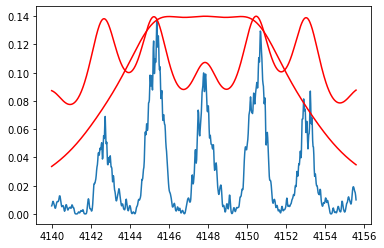

In [36]:
import scipy.special as sci
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import h,pi
from scipy.ndimage import gaussian_filter

#Read CSV file
#for s in np.arange(10,250,3):
data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/12.dir/2020_12_01.dir/00247 - E2LaserSweep_prob.csv', delimiter = ',')

x = data[:,0]
y = gaussian_filter(1-data[:,1], sigma = 1.5)
x = x[:780]
y = y[:780]


sum = np.zeros(len(x))
omega = 2.6 * 10 ** 6
gamma = np.arange(2.1*10**6,2.5*10**6,.5*10**6)
beta = np.arange(0,10,.01)
w_laser = x

def get_model(x,beta,gamma):
    model = np.zeros(len(x))
    max = 0
    for i in range(len(x)):
        for n in np.arange(-8,8,1):
            model[i] += ((sci.jv(n,beta))**2)/((((w_laser[i]-4147.85)*10**6)+n*omega)**2+(.5*gamma)**2)
            if model[i]> max:
                max = model[i]
    model = np.true_divide(model,max/.14)
    return model

def get_residual(x,y):
    res = 0
    for i in range(len(x)):
        res += (x[i]-y[i])**2
    return res

def fit(x,gamma,beta):
    best_fit = get_residual(x,get_model(x,beta[0],gamma[0]))
    ind_i = 0
    ind_j = 0
    for i in range(len(gamma)):
        for j in range(len(beta)):
            mod =  get_residual(x,get_model(x,beta[j],gamma[i]))
            print(mod)
            if mod < best_fit:
                best_fit = mod
                ind_i = i
                ind_j = j
    return (ind_i,ind_j)

# fit_p = fit(x,gamma,beta)
# print(fit_p)
# print(gamma[fit_p[0]],beta[fit_p[1]])
plt.plot(x,y)
# plt.plot(x,get_model(x,beta[fit_p[1]],gamma[fit_p[0]]),color='r')
plt.plot(x,get_model(x,1.6,4.79*10**6),color ='r')
plt.plot(x,get_model(x,9.3,2.1*10**6),color ='r')

plt.show()
